# 영상입력 수치예측모델
### 고정된 지역에서 촬영된 영상으로부터 복잡도, 밀도 등을 수치화할 수 있음
- CCTV 등 촬영 영상으로부터 미세먼지 지수 예측
- 위성 영상으로부터 녹조, 적조 등의 지수 예측
- 태양광 파널의 먼지가 쌓여있는 정도 예측

In [2]:
import numpy as np

### 데이터셋 준비
너비가 16, 높이가 16이고 픽셀값으로 0과 1을 가지는 영상

In [13]:
width = 16
height = 16

def generate_image(points):
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    for ipt in pts:
        img[int(ipt[0]*width), int(ipt[1]*height)] = 1
    return img.reshape(width, height, 1)
        
def generate_dataset(samples):
    ds_x = []
    ds_y = []
    for it in range(samples):
        num_pt = np.random.randint(0, width*height)
        img = generate_image(num_pt)
        ds_y.append(num_pt)
        ds_x.append(img)
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)

In [14]:
x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

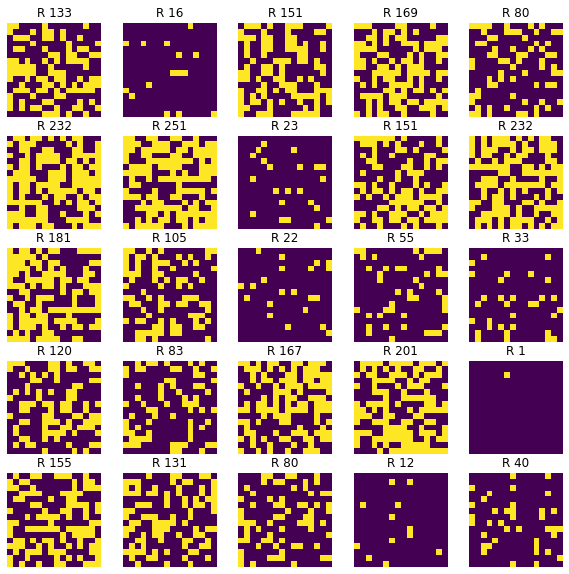

In [16]:
# 데이터셋 가시화
import matplotlib.pyplot as plt
%matplotlib inline

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(width, height))
    sub_plt.set_title('R ' + str(y_train[i][0]))

plt.show()

## 1. 다층퍼셉트론 신경망 모델

In [17]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [25]:
# 1차원 자료 만들기
x_train_1d = x_train.reshape(x_train.shape[0], width*height)
x_val_1d = x_val.reshape(x_val.shape[0], width*height)
x_test_1d = x_test.reshape(x_test.shape[0], width*height)

In [20]:
# 모델 구성하기
model1 = Sequential()
model1.add(Dense(256, input_dim=width*height, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256))
model1.add(Dense(1))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 197,633
Trainable params: 197,633
Non-trainable params: 0
_________________________________________________________________


In [22]:
model1.compile(loss='mse', optimizer='adam')

In [27]:
hist1 = model1.fit(x_train_1d, y_train, batch_size=32, 
                   epochs=1000, validation_data=(x_val_1d, y_val))

W0906 10:08:59.724108  3076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0906 10:08:59.834717  3076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1500 samples, validate on 300 samples
Epoch 1/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 4590.7601 - val_loss: 359.0813
Epoch 2/1000
1500/1500 [==============================] - 0s 124us/step - loss: 257.3750 - val_loss: 206.8073
Epoch 3/1000
1500/1500 [==============================] - 0s 122us/step - loss: 186.8587 - val_loss: 167.0631
Epoch 4/1000
1500/1500 [==============================] - 0s 125us/step - loss: 119.5777 - val_loss: 113.0795
Epoch 5/1000
1500/1500 [==============================] - 0s 123us/step - loss: 87.0541 - val_loss: 101.7610
Epoch 6/1000
1500/1500 [==============================] - 0s 124us/step - loss: 59.2311 - val_loss: 88.4447
Epoch 7/1000
1500/1500 [==============================] - 0s 126us/step - loss: 43.3280 - val_loss: 82.4711
Epoch 8/1000
1500/1500 [==============================] - 0s 124us/step - loss: 30.6111 - val_loss: 79.2122
Epoch 9/1000
1500/1500 [==============================] - 0s 129us/step - loss: 2

1500/1500 [==============================] - 0s 221us/step - loss: 11.0387 - val_loss: 72.3304
Epoch 77/1000
1500/1500 [==============================] - 0s 223us/step - loss: 6.8311 - val_loss: 72.2906
Epoch 78/1000
1500/1500 [==============================] - 0s 221us/step - loss: 8.6495 - val_loss: 78.1425
Epoch 79/1000
1500/1500 [==============================] - 0s 217us/step - loss: 6.1863 - val_loss: 73.1995
Epoch 80/1000
1500/1500 [==============================] - 0s 218us/step - loss: 4.6242 - val_loss: 69.5399
Epoch 81/1000
1500/1500 [==============================] - 0s 217us/step - loss: 3.0210 - val_loss: 69.3998
Epoch 82/1000
1500/1500 [==============================] - 0s 218us/step - loss: 2.6375 - val_loss: 71.0487
Epoch 83/1000
1500/1500 [==============================] - 0s 220us/step - loss: 1.6792 - val_loss: 70.8022
Epoch 84/1000
1500/1500 [==============================] - 0s 223us/step - loss: 0.8090 - val_loss: 70.3787
Epoch 85/1000
1500/1500 [================

1500/1500 [==============================] - 0s 221us/step - loss: 1.7760 - val_loss: 75.5803
Epoch 152/1000
1500/1500 [==============================] - 0s 219us/step - loss: 20.1587 - val_loss: 76.2447
Epoch 153/1000
1500/1500 [==============================] - 0s 220us/step - loss: 9.3294 - val_loss: 92.0087
Epoch 154/1000
1500/1500 [==============================] - 0s 220us/step - loss: 6.1944 - val_loss: 78.4097
Epoch 155/1000
1500/1500 [==============================] - 0s 218us/step - loss: 1.9452 - val_loss: 73.4536
Epoch 156/1000
1500/1500 [==============================] - 0s 219us/step - loss: 0.8691 - val_loss: 73.8836
Epoch 157/1000
1500/1500 [==============================] - 0s 219us/step - loss: 1.2133 - val_loss: 73.7312
Epoch 158/1000
1500/1500 [==============================] - 0s 220us/step - loss: 1.3620 - val_loss: 74.1871
Epoch 159/1000
1500/1500 [==============================] - 0s 218us/step - loss: 0.7083 - val_loss: 73.1428
Epoch 160/1000
1500/1500 [=======

1500/1500 [==============================] - 0s 267us/step - loss: 0.4586 - val_loss: 73.6506
Epoch 227/1000
1500/1500 [==============================] - 0s 278us/step - loss: 0.2267 - val_loss: 72.1283
Epoch 228/1000
1500/1500 [==============================] - 0s 260us/step - loss: 0.2625 - val_loss: 73.4633
Epoch 229/1000
1500/1500 [==============================] - 0s 241us/step - loss: 0.4064 - val_loss: 72.7498
Epoch 230/1000
1500/1500 [==============================] - 0s 237us/step - loss: 0.3800 - val_loss: 73.1048
Epoch 231/1000
1500/1500 [==============================] - 0s 233us/step - loss: 0.2306 - val_loss: 73.0060
Epoch 232/1000
1500/1500 [==============================] - 0s 236us/step - loss: 0.6493 - val_loss: 74.3053
Epoch 233/1000
1500/1500 [==============================] - 0s 237us/step - loss: 0.5517 - val_loss: 74.7316
Epoch 234/1000
1500/1500 [==============================] - 0s 239us/step - loss: 1.2090 - val_loss: 73.2681
Epoch 235/1000
1500/1500 [========

1500/1500 [==============================] - 0s 257us/step - loss: 2.2348 - val_loss: 73.2411
Epoch 302/1000
1500/1500 [==============================] - 0s 249us/step - loss: 1.9687 - val_loss: 73.7220
Epoch 303/1000
1500/1500 [==============================] - 0s 250us/step - loss: 1.8095 - val_loss: 73.9350
Epoch 304/1000
1500/1500 [==============================] - 0s 310us/step - loss: 0.8039 - val_loss: 72.4730
Epoch 305/1000
1500/1500 [==============================] - 0s 273us/step - loss: 0.9988 - val_loss: 77.3749
Epoch 306/1000
1500/1500 [==============================] - 0s 324us/step - loss: 1.0659 - val_loss: 72.6176
Epoch 307/1000
1500/1500 [==============================] - 0s 252us/step - loss: 0.8430 - val_loss: 72.1482
Epoch 308/1000
1500/1500 [==============================] - 0s 241us/step - loss: 1.5367 - val_loss: 72.8647
Epoch 309/1000
1500/1500 [==============================] - 0s 239us/step - loss: 4.9867 - val_loss: 76.5932
Epoch 310/1000
1500/1500 [========

1500/1500 [==============================] - 0s 307us/step - loss: 0.3838 - val_loss: 73.4982
Epoch 377/1000
1500/1500 [==============================] - 0s 289us/step - loss: 0.1779 - val_loss: 73.2183
Epoch 378/1000
1500/1500 [==============================] - 0s 266us/step - loss: 0.1626 - val_loss: 73.4134
Epoch 379/1000
1500/1500 [==============================] - 0s 274us/step - loss: 0.1250 - val_loss: 73.2385
Epoch 380/1000
1500/1500 [==============================] - 0s 270us/step - loss: 0.1455 - val_loss: 74.2992
Epoch 381/1000
1500/1500 [==============================] - 0s 262us/step - loss: 0.1956 - val_loss: 73.8704
Epoch 382/1000
1500/1500 [==============================] - 0s 277us/step - loss: 0.1519 - val_loss: 74.2468
Epoch 383/1000
1500/1500 [==============================] - 0s 324us/step - loss: 0.7327 - val_loss: 72.9646
Epoch 384/1000
1500/1500 [==============================] - 0s 303us/step - loss: 0.6547 - val_loss: 73.2887
Epoch 385/1000
1500/1500 [========

1500/1500 [==============================] - 0s 253us/step - loss: 0.7372 - val_loss: 74.2062
Epoch 452/1000
1500/1500 [==============================] - 0s 250us/step - loss: 0.3666 - val_loss: 74.1719
Epoch 453/1000
1500/1500 [==============================] - 1s 354us/step - loss: 0.2584 - val_loss: 73.8692
Epoch 454/1000
1500/1500 [==============================] - 0s 257us/step - loss: 0.1684 - val_loss: 74.3908
Epoch 455/1000
1500/1500 [==============================] - 0s 252us/step - loss: 0.0897 - val_loss: 74.3537
Epoch 456/1000
1500/1500 [==============================] - 0s 250us/step - loss: 0.0991 - val_loss: 74.8383
Epoch 457/1000
1500/1500 [==============================] - 1s 348us/step - loss: 0.1088 - val_loss: 75.1459
Epoch 458/1000
1500/1500 [==============================] - 1s 337us/step - loss: 0.0697 - val_loss: 73.7683
Epoch 459/1000
1500/1500 [==============================] - 1s 347us/step - loss: 0.0785 - val_loss: 74.0660
Epoch 460/1000
1500/1500 [========

1500/1500 [==============================] - 0s 238us/step - loss: 1.8034 - val_loss: 74.6449
Epoch 527/1000
1500/1500 [==============================] - 0s 236us/step - loss: 1.0372 - val_loss: 74.0075
Epoch 528/1000
1500/1500 [==============================] - 0s 230us/step - loss: 0.6123 - val_loss: 75.7093
Epoch 529/1000
1500/1500 [==============================] - 0s 224us/step - loss: 0.6090 - val_loss: 73.6049
Epoch 530/1000
1500/1500 [==============================] - 0s 221us/step - loss: 0.4678 - val_loss: 74.5938
Epoch 531/1000
1500/1500 [==============================] - 0s 222us/step - loss: 0.2164 - val_loss: 76.6120
Epoch 532/1000
1500/1500 [==============================] - 0s 222us/step - loss: 0.4368 - val_loss: 75.9305
Epoch 533/1000
1500/1500 [==============================] - 0s 221us/step - loss: 0.2786 - val_loss: 76.8959
Epoch 534/1000
1500/1500 [==============================] - 0s 222us/step - loss: 0.1404 - val_loss: 74.8473
Epoch 535/1000
1500/1500 [========

1500/1500 [==============================] - 0s 249us/step - loss: 0.6552 - val_loss: 74.0243
Epoch 602/1000
1500/1500 [==============================] - 0s 251us/step - loss: 0.9809 - val_loss: 74.9359
Epoch 603/1000
1500/1500 [==============================] - 0s 254us/step - loss: 1.1871 - val_loss: 74.0035
Epoch 604/1000
1500/1500 [==============================] - 0s 266us/step - loss: 0.8885 - val_loss: 74.2848
Epoch 605/1000
1500/1500 [==============================] - 0s 265us/step - loss: 0.8907 - val_loss: 74.8166
Epoch 606/1000
1500/1500 [==============================] - 0s 266us/step - loss: 0.5807 - val_loss: 77.3500
Epoch 607/1000
1500/1500 [==============================] - 0s 268us/step - loss: 0.3872 - val_loss: 75.8640
Epoch 608/1000
1500/1500 [==============================] - 0s 268us/step - loss: 0.1837 - val_loss: 75.2305
Epoch 609/1000
1500/1500 [==============================] - 0s 266us/step - loss: 0.1382 - val_loss: 74.6121
Epoch 610/1000
1500/1500 [========

1500/1500 [==============================] - 0s 222us/step - loss: 0.8965 - val_loss: 75.2991
Epoch 677/1000
1500/1500 [==============================] - 0s 220us/step - loss: 0.8261 - val_loss: 77.7540
Epoch 678/1000
1500/1500 [==============================] - 0s 223us/step - loss: 0.7032 - val_loss: 78.4084
Epoch 679/1000
1500/1500 [==============================] - 0s 223us/step - loss: 0.4857 - val_loss: 77.5275
Epoch 680/1000
1500/1500 [==============================] - 0s 225us/step - loss: 0.3758 - val_loss: 77.5691
Epoch 681/1000
1500/1500 [==============================] - 0s 227us/step - loss: 0.2921 - val_loss: 75.5040
Epoch 682/1000
1500/1500 [==============================] - 0s 222us/step - loss: 0.5837 - val_loss: 74.8623
Epoch 683/1000
1500/1500 [==============================] - 0s 219us/step - loss: 0.4845 - val_loss: 78.1800
Epoch 684/1000
1500/1500 [==============================] - 0s 222us/step - loss: 1.8772 - val_loss: 79.6489
Epoch 685/1000
1500/1500 [========

1500/1500 [==============================] - 0s 221us/step - loss: 0.3946 - val_loss: 77.8357
Epoch 752/1000
1500/1500 [==============================] - 0s 223us/step - loss: 0.2681 - val_loss: 77.0705
Epoch 753/1000
1500/1500 [==============================] - 0s 224us/step - loss: 0.3964 - val_loss: 74.1917
Epoch 754/1000
1500/1500 [==============================] - 0s 221us/step - loss: 0.4542 - val_loss: 75.2402
Epoch 755/1000
1500/1500 [==============================] - 0s 222us/step - loss: 0.5330 - val_loss: 76.0583
Epoch 756/1000
1500/1500 [==============================] - 0s 223us/step - loss: 0.7994 - val_loss: 76.3877
Epoch 757/1000
1500/1500 [==============================] - 0s 219us/step - loss: 1.6164 - val_loss: 75.5234
Epoch 758/1000
1500/1500 [==============================] - 0s 222us/step - loss: 0.9064 - val_loss: 76.8066
Epoch 759/1000
1500/1500 [==============================] - 0s 220us/step - loss: 0.7888 - val_loss: 76.1192
Epoch 760/1000
1500/1500 [========

1500/1500 [==============================] - 0s 236us/step - loss: 0.4818 - val_loss: 74.6265
Epoch 827/1000
1500/1500 [==============================] - 0s 238us/step - loss: 0.2267 - val_loss: 75.5337
Epoch 828/1000
1500/1500 [==============================] - 0s 237us/step - loss: 0.1872 - val_loss: 75.0206
Epoch 829/1000
1500/1500 [==============================] - 0s 237us/step - loss: 1.0342 - val_loss: 81.1335
Epoch 830/1000
1500/1500 [==============================] - 0s 240us/step - loss: 1.4713 - val_loss: 78.0768
Epoch 831/1000
1500/1500 [==============================] - 0s 233us/step - loss: 0.9440 - val_loss: 75.1157
Epoch 832/1000
1500/1500 [==============================] - 0s 242us/step - loss: 0.9013 - val_loss: 79.4029
Epoch 833/1000
1500/1500 [==============================] - 0s 232us/step - loss: 0.9475 - val_loss: 73.7976
Epoch 834/1000
1500/1500 [==============================] - 0s 233us/step - loss: 0.8765 - val_loss: 77.6603
Epoch 835/1000
1500/1500 [========

1500/1500 [==============================] - 0s 226us/step - loss: 0.0501 - val_loss: 76.2001
Epoch 902/1000
1500/1500 [==============================] - 0s 222us/step - loss: 0.0480 - val_loss: 76.4029
Epoch 903/1000
1500/1500 [==============================] - 0s 221us/step - loss: 0.0301 - val_loss: 76.3183
Epoch 904/1000
1500/1500 [==============================] - 0s 221us/step - loss: 0.0400 - val_loss: 76.7807
Epoch 905/1000
1500/1500 [==============================] - 0s 222us/step - loss: 0.0249 - val_loss: 76.2963
Epoch 906/1000
1500/1500 [==============================] - 0s 225us/step - loss: 0.0239 - val_loss: 76.3348
Epoch 907/1000
1500/1500 [==============================] - 0s 221us/step - loss: 0.0129 - val_loss: 76.5903
Epoch 908/1000
1500/1500 [==============================] - 0s 223us/step - loss: 0.0083 - val_loss: 76.4449
Epoch 909/1000
1500/1500 [==============================] - 0s 226us/step - loss: 0.0159 - val_loss: 76.3987
Epoch 910/1000
1500/1500 [========

1500/1500 [==============================] - 0s 238us/step - loss: 6.8634 - val_loss: 89.5953
Epoch 977/1000
1500/1500 [==============================] - 0s 238us/step - loss: 6.8949 - val_loss: 77.2178
Epoch 978/1000
1500/1500 [==============================] - 0s 241us/step - loss: 1.7539 - val_loss: 76.8847
Epoch 979/1000
1500/1500 [==============================] - 0s 235us/step - loss: 1.2340 - val_loss: 79.0172
Epoch 980/1000
1500/1500 [==============================] - 0s 238us/step - loss: 0.4543 - val_loss: 75.2096
Epoch 981/1000
1500/1500 [==============================] - 0s 236us/step - loss: 0.2258 - val_loss: 76.0590
Epoch 982/1000
1500/1500 [==============================] - 0s 234us/step - loss: 0.2398 - val_loss: 76.2871
Epoch 983/1000
1500/1500 [==============================] - ETA: 0s - loss: 0.183 - 0s 238us/step - loss: 0.1865 - val_loss: 75.8590
Epoch 984/1000
1500/1500 [==============================] - 0s 236us/step - loss: 0.1642 - val_loss: 75.8714
Epoch 985/

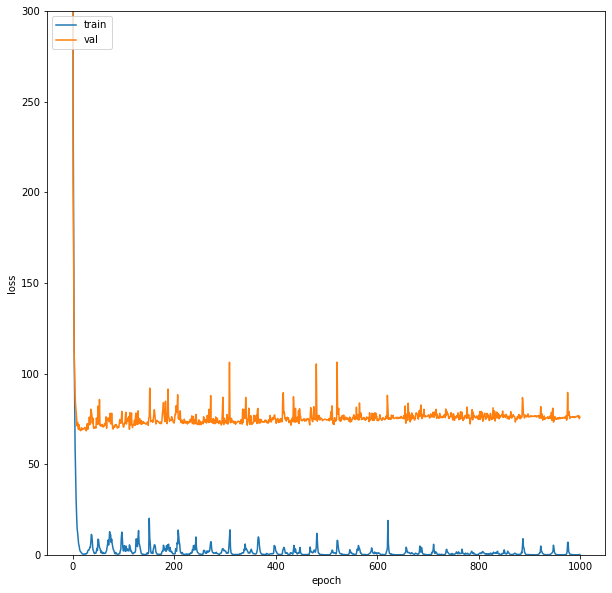

In [29]:
# 학습과정 살펴보기
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.ylim([0.0, 300.0])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
# 모델 평가하기
score1 = model1.evaluate(x_test_1d, y_test, batch_size=32)
print(score1)

100/100 [==============================] - 0s 134us/step
87.94478382110596


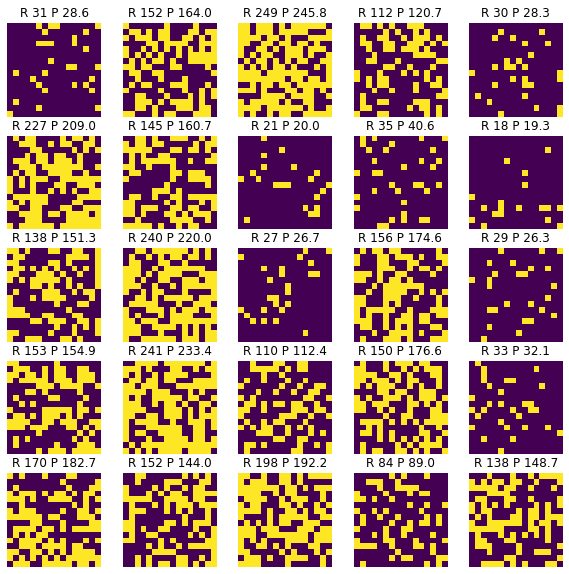

In [32]:
# 모델 사용하기 (R: real, P: prediction)
yhat_test = model1.predict(x_test_1d, batch_size=32)

plt.rcParams['figure.figsize'] = (10,10)
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()

## 2. 컨볼루션 신경망 모델

In [33]:
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [35]:
# 모델 구성하기
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(width, height, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1))
model2.summary()

W0906 10:40:06.822538  3076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [36]:
model2.compile(loss='mse', optimizer='adam')

In [37]:
hist2 = model2.fit(x_train, y_train, batch_size=32, 
                   epochs=1000, validation_data=(x_val, y_val))

Train on 1500 samples, validate on 300 samples
Epoch 1/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 10895.2058 - val_loss: 1565.8624
Epoch 2/1000
1500/1500 [==============================] - 0s 186us/step - loss: 1353.3107 - val_loss: 1194.6457
Epoch 3/1000
1500/1500 [==============================] - 0s 196us/step - loss: 1023.9693 - val_loss: 953.7315
Epoch 4/1000
1500/1500 [==============================] - 0s 189us/step - loss: 735.4531 - val_loss: 561.5611
Epoch 5/1000
1500/1500 [==============================] - 0s 197us/step - loss: 447.3542 - val_loss: 348.5496
Epoch 6/1000
1500/1500 [==============================] - 0s 195us/step - loss: 312.3949 - val_loss: 286.3550
Epoch 7/1000
1500/1500 [==============================] - 0s 193us/step - loss: 283.3922 - val_loss: 258.2163
Epoch 8/1000
1500/1500 [==============================] - 0s 193us/step - loss: 268.5955 - val_loss: 279.6961
Epoch 9/1000
1500/1500 [==============================] - 0s 194us/st

1500/1500 [==============================] - 1s 372us/step - loss: 107.0196 - val_loss: 148.7158
Epoch 75/1000
1500/1500 [==============================] - 1s 365us/step - loss: 107.0193 - val_loss: 148.6583
Epoch 76/1000
1500/1500 [==============================] - 1s 365us/step - loss: 106.0788 - val_loss: 155.1888
Epoch 77/1000
1500/1500 [==============================] - 1s 365us/step - loss: 107.6182 - val_loss: 146.2458
Epoch 78/1000
1500/1500 [==============================] - 1s 363us/step - loss: 107.0431 - val_loss: 150.0850
Epoch 79/1000
1500/1500 [==============================] - 1s 360us/step - loss: 97.4926 - val_loss: 170.3022
Epoch 80/1000
1500/1500 [==============================] - 1s 359us/step - loss: 99.6101 - val_loss: 166.1948
Epoch 81/1000
1500/1500 [==============================] - 1s 360us/step - loss: 94.4379 - val_loss: 175.0507
Epoch 82/1000
1500/1500 [==============================] - 1s 361us/step - loss: 99.0766 - val_loss: 162.2088
Epoch 83/1000
1500/

1500/1500 [==============================] - 1s 362us/step - loss: 18.8849 - val_loss: 202.5997
Epoch 148/1000
1500/1500 [==============================] - 1s 360us/step - loss: 18.6142 - val_loss: 194.3257
Epoch 149/1000
1500/1500 [==============================] - 1s 362us/step - loss: 17.9899 - val_loss: 192.9387
Epoch 150/1000
1500/1500 [==============================] - 1s 364us/step - loss: 18.3980 - val_loss: 197.0820
Epoch 151/1000
1500/1500 [==============================] - 1s 356us/step - loss: 16.8687 - val_loss: 197.5440
Epoch 152/1000
1500/1500 [==============================] - 1s 364us/step - loss: 16.4548 - val_loss: 214.6059
Epoch 153/1000
1500/1500 [==============================] - 1s 360us/step - loss: 20.3047 - val_loss: 210.4382
Epoch 154/1000
1500/1500 [==============================] - 1s 367us/step - loss: 16.1976 - val_loss: 195.9203
Epoch 155/1000
1500/1500 [==============================] - 1s 363us/step - loss: 13.6682 - val_loss: 197.4476
Epoch 156/1000
1

1500/1500 [==============================] - 1s 364us/step - loss: 1.5588 - val_loss: 224.7789
Epoch 222/1000
1500/1500 [==============================] - 1s 361us/step - loss: 1.6903 - val_loss: 230.2720
Epoch 223/1000
1500/1500 [==============================] - 1s 363us/step - loss: 2.8505 - val_loss: 226.7682
Epoch 224/1000
1500/1500 [==============================] - 1s 363us/step - loss: 2.1093 - val_loss: 225.3772
Epoch 225/1000
1500/1500 [==============================] - 1s 359us/step - loss: 1.0626 - val_loss: 225.0836
Epoch 226/1000
1500/1500 [==============================] - 1s 368us/step - loss: 1.3233 - val_loss: 227.2176
Epoch 227/1000
1500/1500 [==============================] - 1s 378us/step - loss: 1.2840 - val_loss: 225.8378
Epoch 228/1000
1500/1500 [==============================] - 1s 378us/step - loss: 1.3530 - val_loss: 224.3785
Epoch 229/1000
1500/1500 [==============================] - 1s 385us/step - loss: 1.0214 - val_loss: 227.8364
Epoch 230/1000
1500/1500 

1500/1500 [==============================] - 1s 364us/step - loss: 0.3698 - val_loss: 227.0242
Epoch 296/1000
1500/1500 [==============================] - 1s 367us/step - loss: 0.2721 - val_loss: 226.9388
Epoch 297/1000
1500/1500 [==============================] - 1s 372us/step - loss: 0.2612 - val_loss: 227.6988
Epoch 298/1000
1500/1500 [==============================] - 1s 351us/step - loss: 0.5455 - val_loss: 227.8683
Epoch 299/1000
1500/1500 [==============================] - 1s 357us/step - loss: 0.6600 - val_loss: 222.5880
Epoch 300/1000
1500/1500 [==============================] - 1s 359us/step - loss: 0.6718 - val_loss: 225.0783
Epoch 301/1000
1500/1500 [==============================] - 1s 358us/step - loss: 1.1834 - val_loss: 231.5802
Epoch 302/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.9114 - val_loss: 228.3795
Epoch 303/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.6275 - val_loss: 224.4592
Epoch 304/1000
1500/1500 

1500/1500 [==============================] - 1s 363us/step - loss: 0.1276 - val_loss: 221.7091
Epoch 370/1000
1500/1500 [==============================] - 1s 365us/step - loss: 0.1257 - val_loss: 222.5431
Epoch 371/1000
1500/1500 [==============================] - 1s 362us/step - loss: 0.1254 - val_loss: 223.5420
Epoch 372/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.3605 - val_loss: 221.9911
Epoch 373/1000
1500/1500 [==============================] - 1s 359us/step - loss: 0.3447 - val_loss: 223.8840
Epoch 374/1000
1500/1500 [==============================] - 1s 364us/step - loss: 0.7246 - val_loss: 219.4726
Epoch 375/1000
1500/1500 [==============================] - 1s 354us/step - loss: 1.4548 - val_loss: 227.7014
Epoch 376/1000
1500/1500 [==============================] - 1s 360us/step - loss: 1.0146 - val_loss: 225.7122
Epoch 377/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.8350 - val_loss: 224.9105
Epoch 378/1000
1500/1500 

1500/1500 [==============================] - 1s 364us/step - loss: 0.3296 - val_loss: 218.5425
Epoch 444/1000
1500/1500 [==============================] - 1s 362us/step - loss: 0.1951 - val_loss: 218.9090
Epoch 445/1000
1500/1500 [==============================] - 1s 365us/step - loss: 0.1201 - val_loss: 219.4033
Epoch 446/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.2486 - val_loss: 218.7607
Epoch 447/1000
1500/1500 [==============================] - 1s 360us/step - loss: 0.1647 - val_loss: 220.0369
Epoch 448/1000
1500/1500 [==============================] - 1s 360us/step - loss: 0.1460 - val_loss: 218.8949
Epoch 449/1000
1500/1500 [==============================] - 1s 359us/step - loss: 0.1419 - val_loss: 218.1840
Epoch 450/1000
1500/1500 [==============================] - 1s 364us/step - loss: 0.1171 - val_loss: 219.0247
Epoch 451/1000
1500/1500 [==============================] - 1s 358us/step - loss: 0.1017 - val_loss: 218.3902
Epoch 452/1000
1500/1500 

1500/1500 [==============================] - 1s 389us/step - loss: 0.3972 - val_loss: 215.2447
Epoch 518/1000
1500/1500 [==============================] - 1s 379us/step - loss: 0.3522 - val_loss: 216.4975
Epoch 519/1000
1500/1500 [==============================] - 1s 382us/step - loss: 0.3206 - val_loss: 216.0603
Epoch 520/1000
1500/1500 [==============================] - 1s 381us/step - loss: 0.2188 - val_loss: 216.9020
Epoch 521/1000
1500/1500 [==============================] - 1s 381us/step - loss: 0.1208 - val_loss: 215.9682
Epoch 522/1000
1500/1500 [==============================] - 1s 382us/step - loss: 0.0946 - val_loss: 218.4424
Epoch 523/1000
1500/1500 [==============================] - 1s 378us/step - loss: 0.0899 - val_loss: 216.2891
Epoch 524/1000
1500/1500 [==============================] - 1s 382us/step - loss: 0.0753 - val_loss: 216.4085
Epoch 525/1000
1500/1500 [==============================] - 1s 381us/step - loss: 0.0586 - val_loss: 215.6626
Epoch 526/1000
1500/1500 

1500/1500 [==============================] - 1s 364us/step - loss: 0.7858 - val_loss: 214.0100
Epoch 592/1000
1500/1500 [==============================] - 1s 363us/step - loss: 0.5486 - val_loss: 215.3892
Epoch 593/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.3817 - val_loss: 213.6915
Epoch 594/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.2130 - val_loss: 215.8052
Epoch 595/1000
1500/1500 [==============================] - 1s 359us/step - loss: 0.4602 - val_loss: 211.4829
Epoch 596/1000
1500/1500 [==============================] - 1s 362us/step - loss: 0.3861 - val_loss: 215.5189
Epoch 597/1000
1500/1500 [==============================] - 1s 366us/step - loss: 0.2224 - val_loss: 213.4229
Epoch 598/1000
1500/1500 [==============================] - 1s 359us/step - loss: 0.2089 - val_loss: 215.8020
Epoch 599/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.4583 - val_loss: 216.0012
Epoch 600/1000
1500/1500 

1500/1500 [==============================] - 1s 362us/step - loss: 0.4979 - val_loss: 213.4353
Epoch 666/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.6366 - val_loss: 214.6947
Epoch 667/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.5332 - val_loss: 213.2631
Epoch 668/1000
1500/1500 [==============================] - 1s 364us/step - loss: 0.6194 - val_loss: 211.4991
Epoch 669/1000
1500/1500 [==============================] - 1s 362us/step - loss: 1.3778 - val_loss: 216.2978
Epoch 670/1000
1500/1500 [==============================] - 1s 364us/step - loss: 1.1999 - val_loss: 213.5602
Epoch 671/1000
1500/1500 [==============================] - 1s 361us/step - loss: 2.2607 - val_loss: 210.2858
Epoch 672/1000
1500/1500 [==============================] - 1s 360us/step - loss: 1.8912 - val_loss: 216.7301
Epoch 673/1000
1500/1500 [==============================] - 1s 365us/step - loss: 1.8893 - val_loss: 210.5743
Epoch 674/1000
1500/1500 

1500/1500 [==============================] - 1s 363us/step - loss: 0.5331 - val_loss: 212.7915
Epoch 740/1000
1500/1500 [==============================] - 1s 362us/step - loss: 0.3400 - val_loss: 210.9414
Epoch 741/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.3434 - val_loss: 213.6317
Epoch 742/1000
1500/1500 [==============================] - 1s 359us/step - loss: 0.3396 - val_loss: 212.9551
Epoch 743/1000
1500/1500 [==============================] - 1s 360us/step - loss: 0.2138 - val_loss: 213.5745
Epoch 744/1000
1500/1500 [==============================] - 1s 360us/step - loss: 0.1883 - val_loss: 212.8105
Epoch 745/1000
1500/1500 [==============================] - 1s 362us/step - loss: 0.3716 - val_loss: 214.5455
Epoch 746/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.2551 - val_loss: 212.6094
Epoch 747/1000
1500/1500 [==============================] - 1s 360us/step - loss: 0.2993 - val_loss: 213.6071
Epoch 748/1000
1500/1500 

1500/1500 [==============================] - 1s 361us/step - loss: 0.2719 - val_loss: 213.2883
Epoch 814/1000
1500/1500 [==============================] - 1s 363us/step - loss: 0.3256 - val_loss: 212.4909
Epoch 815/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.4675 - val_loss: 211.1543
Epoch 816/1000
1500/1500 [==============================] - 1s 364us/step - loss: 0.8682 - val_loss: 218.4887
Epoch 817/1000
1500/1500 [==============================] - 1s 359us/step - loss: 2.7820 - val_loss: 211.2507
Epoch 818/1000
1500/1500 [==============================] - 1s 358us/step - loss: 2.2530 - val_loss: 217.2788
Epoch 819/1000
1500/1500 [==============================] - 1s 363us/step - loss: 1.8872 - val_loss: 215.3731
Epoch 820/1000
1500/1500 [==============================] - 1s 362us/step - loss: 1.3841 - val_loss: 217.3636
Epoch 821/1000
1500/1500 [==============================] - 1s 358us/step - loss: 1.0941 - val_loss: 213.8790
Epoch 822/1000
1500/1500 

1500/1500 [==============================] - 1s 367us/step - loss: 0.1328 - val_loss: 211.5357
Epoch 888/1000
1500/1500 [==============================] - 1s 367us/step - loss: 0.2085 - val_loss: 211.1182
Epoch 889/1000
1500/1500 [==============================] - 1s 360us/step - loss: 0.0895 - val_loss: 212.9271
Epoch 890/1000
1500/1500 [==============================] - 1s 361us/step - loss: 0.0751 - val_loss: 211.1995
Epoch 891/1000
1500/1500 [==============================] - 1s 366us/step - loss: 0.1488 - val_loss: 211.6651
Epoch 892/1000
1500/1500 [==============================] - 1s 364us/step - loss: 0.0928 - val_loss: 213.1418
Epoch 893/1000
1500/1500 [==============================] - 1s 365us/step - loss: 0.2966 - val_loss: 210.2396
Epoch 894/1000
1500/1500 [==============================] - 1s 364us/step - loss: 0.2821 - val_loss: 211.4059
Epoch 895/1000
1500/1500 [==============================] - 1s 365us/step - loss: 0.1520 - val_loss: 212.4892
Epoch 896/1000
1500/1500 

1500/1500 [==============================] - 1s 368us/step - loss: 1.1890 - val_loss: 217.2158
Epoch 962/1000
1500/1500 [==============================] - 1s 363us/step - loss: 0.9866 - val_loss: 211.2232
Epoch 963/1000
1500/1500 [==============================] - 1s 359us/step - loss: 0.5676 - val_loss: 208.7527
Epoch 964/1000
1500/1500 [==============================] - 1s 360us/step - loss: 0.6164 - val_loss: 209.7644
Epoch 965/1000
1500/1500 [==============================] - 1s 360us/step - loss: 0.3428 - val_loss: 210.3803
Epoch 966/1000
1500/1500 [==============================] - 1s 364us/step - loss: 0.2380 - val_loss: 211.0628
Epoch 967/1000
1500/1500 [==============================] - 1s 362us/step - loss: 0.7045 - val_loss: 213.7169
Epoch 968/1000
1500/1500 [==============================] - 1s 362us/step - loss: 1.3973 - val_loss: 208.6531
Epoch 969/1000
1500/1500 [==============================] - 1s 364us/step - loss: 1.2865 - val_loss: 207.2590
Epoch 970/1000
1500/1500 

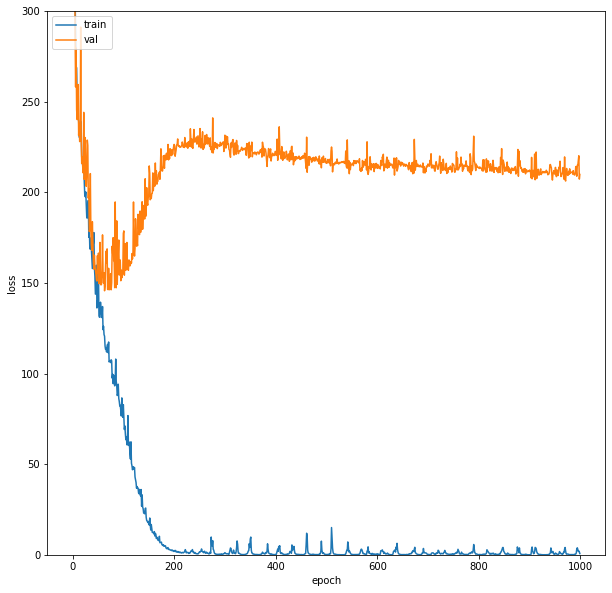

In [40]:
# 학습과정 살펴보기
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.ylim([0.0, 300.0])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
# 모델 평가하기
score2 = model2.evaluate(x_test, y_test, batch_size=32)
print(score2)

100/100 [==============================] - 0s 555us/step
193.24848876953126


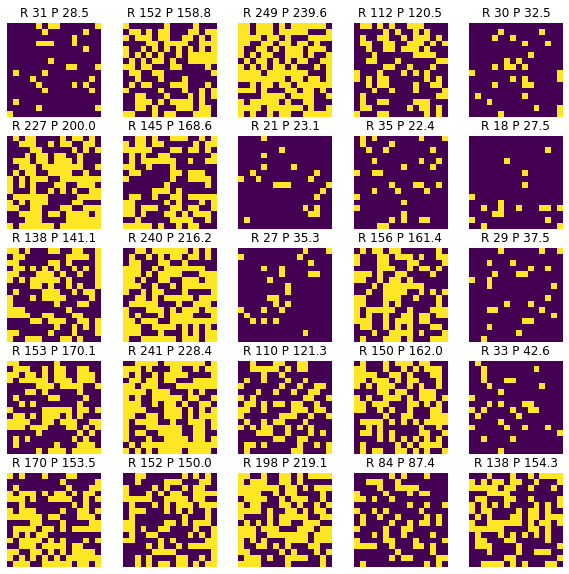

In [39]:
# 모델 사용하기 (R: real, P: prediction)
yhat_test = model2.predict(x_test, batch_size=32)

plt.rcParams['figure.figsize'] = (10,10)
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()